![alt text](https://cdn.newsbook.com.mt/wp-content/uploads/2019/03/0f40cb07fbf640d883755f420e91f6ec.jpg)

# Introduction 

### Welcome
I will like to take this opportunity to thank you for taking the initiative to work on your learning. Online courses and lectures do a great job in feeding you valuable knowledge but do you actually understand? If you are the person who read through a math textbook without lifting a pen, you are not alone! People tend to assume they know something but the only way to prove it is applying. In this walkthrough I will guide you and explain it to you as much as possible. If you still have any question please message me or drop the question on discord. This is not a perfect notebook. There may be flaws or errors and I do apologise beforehand. Kindly let me know and I will fix it immediately.

### Context 
This dataset is obtained from [Kaggle](https://www.kaggle.com/unsdsn/world-happiness). I have modified the data to contain only data from 2015 to 2017. This report ranks 155 countries by their happiness level through 6 indicators:

- economic production
- social support
- life expectancy 
- freedom 
- absence of corruption
- generosity

The last indicator is dystopia residual. Dystopia residual is "the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country".  Dystopia is a made up country that has the world's least happiest people. This made up country is high in corruption, low in average income, employment, etc. Dystopia residual is used as a benchmark and should be used side-by-side with the happiness score. 
- Low dystopia residual = low level of happiness 
- high dystopia residual = high level of happiness.

### Understanding the column data
- Country
- Happiness rank 
- Happiness score 
 * This is obtained from a sample of population. The survey-taker asked the respondent to rate their happiness from 1 to 10. 
- Economic (GDP per cap)
 * Extend of GDP that contributes to the happiness score
- Family
 * To what extend does family contribute to the happiness score 
- Health
 * Extend of health (life expectancy) contribute to the happiness score 
- Freedom
 * Extend of freedom that contribute to happiness. The freedom here represents the freedom of speech, freedom to pursue what we want, etc
- Trust (Government corruption)
 * Extend of trust with regards to government corruption that contribute to happiness score 
- Generosity 
 * Extend of generosity that contribute to happiness score 
- dystopia residual
- Year

#### Do note:
$ Happiness Score = Economic (GDP per cap) + Family + Health + Freedom + Trust + Generosity + Dystopia Residual $

## Let's get started!

In [1]:
# Importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


## Explanation of packages (feel free to skip if you are familiar)
### Pandas
Pandas works great on tabular (presented in tables or columns) data. These data can be merged, manipulated, reshaped and combined in just a few lines of code. 

### Numpy
Numpy works specifically on [N-dimensional arrays](https://www.w3resource.com/numpy/ndarray/index.php).  

### Matplotlib
Library for creating static, animated, and interactive visualizations in Python.
- I will describe matplotlib as a manual car.

### Seaborn
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. In short, it allows you to make quick plot with just a line of code and you do not need to worry about customisation of plots (eg: working with colour palette). We will be using Seaborn for most of our plots and do feel free to use matplotlib if you are comfortable with that. I usually use matplotlib when I need to customise the plot to my flavor. 
- I will describe seaborn as an auto car.

In [2]:
# After uploading the file, we are able to see the name of the file saved as "World_Happiness_2015_2017.csv"
# Use pd.read_csv() to read the file and assign it to variable call "data"
data = pd.read_csv('World_Happiness_2015_2017.csv')

# We then use data.head() to see the first 5 rows of data
data.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


### Looking into data.shape() to see rows and columns
- We should be able to see (470,11) as output. 470 represents number of rows while 11 represents number of columns.
- We then use data.dtypes to identify the type for each column. Type can come in many form: str, int, float, object, etc. 
- The main purpose for this is that we will need to change the type if we want to manipulate data. For instance if my happiness ranking is a string type, I may have issue adding things up or perform statistical analysis on it. I will need to change it to int. This can be done using pandas.DataFrame.astype(). We will change the year column from int to float in the following exercise (Reason: just for you to practise. We will change back to Int after that)


In [3]:
# Then what I do next is look into shape using data.shape(). This will tell me how many rows and columns there are.
data.shape

(470, 11)

In [4]:
# Now lets see data types using data.dtypes
data.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                               int64
dtype: object

In [5]:
# Now lets change the data type of country from object to string 
data['Year'] = data['Year'].astype('float')

# Now let's check if we did it right
data.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                             float64
dtype: object

In [6]:
# Have a look at data
data.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015.0
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015.0
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015.0
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015.0
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015.0


In [7]:
# Yikes! Year in decimals! Let's change it back to int!
data['Year'] = data['Year'].astype('int')

### Looking into null values. There are numerous way you can deal with null, NaN or unknown values.
- Omitting rows with null/NaN values
  * This helps our output to be more robust and accurate
  * However this should only be done when we have sufficient data. If we have more than 50% NaN values, we may not be able to omit the affected rows.
- Replace these NaN and null values with mean or median
 * This saves us the worry for loss of information
 * This does increase our data variance and bias

To identify null values, we use **data.isnull().sum()**
- isnull() returns boolean (True or False). Is this value null? Yes or No?
- sum() calculate the number of True
- For this practice I have personally picked one dataset with no null value. So you should see 0 for each column.

In [8]:
# Lets calculate the number of null values
data.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

## Next up! Plotting!
- Here, we will want to see the relationship among attributes. My favourite way to visualise that is through seaborn's pairplot.
- This can be done using sns.pairplot(). 
 * I then adjust the layout to include a title call "FacetGrid plot", with fontsize of 20. I use adjust to adjust the spacing of margin and plot. You can experiment the number to your favor.
 * Note: If you are using dark theme on google colab you may need to change to light in order to see the axis name. 

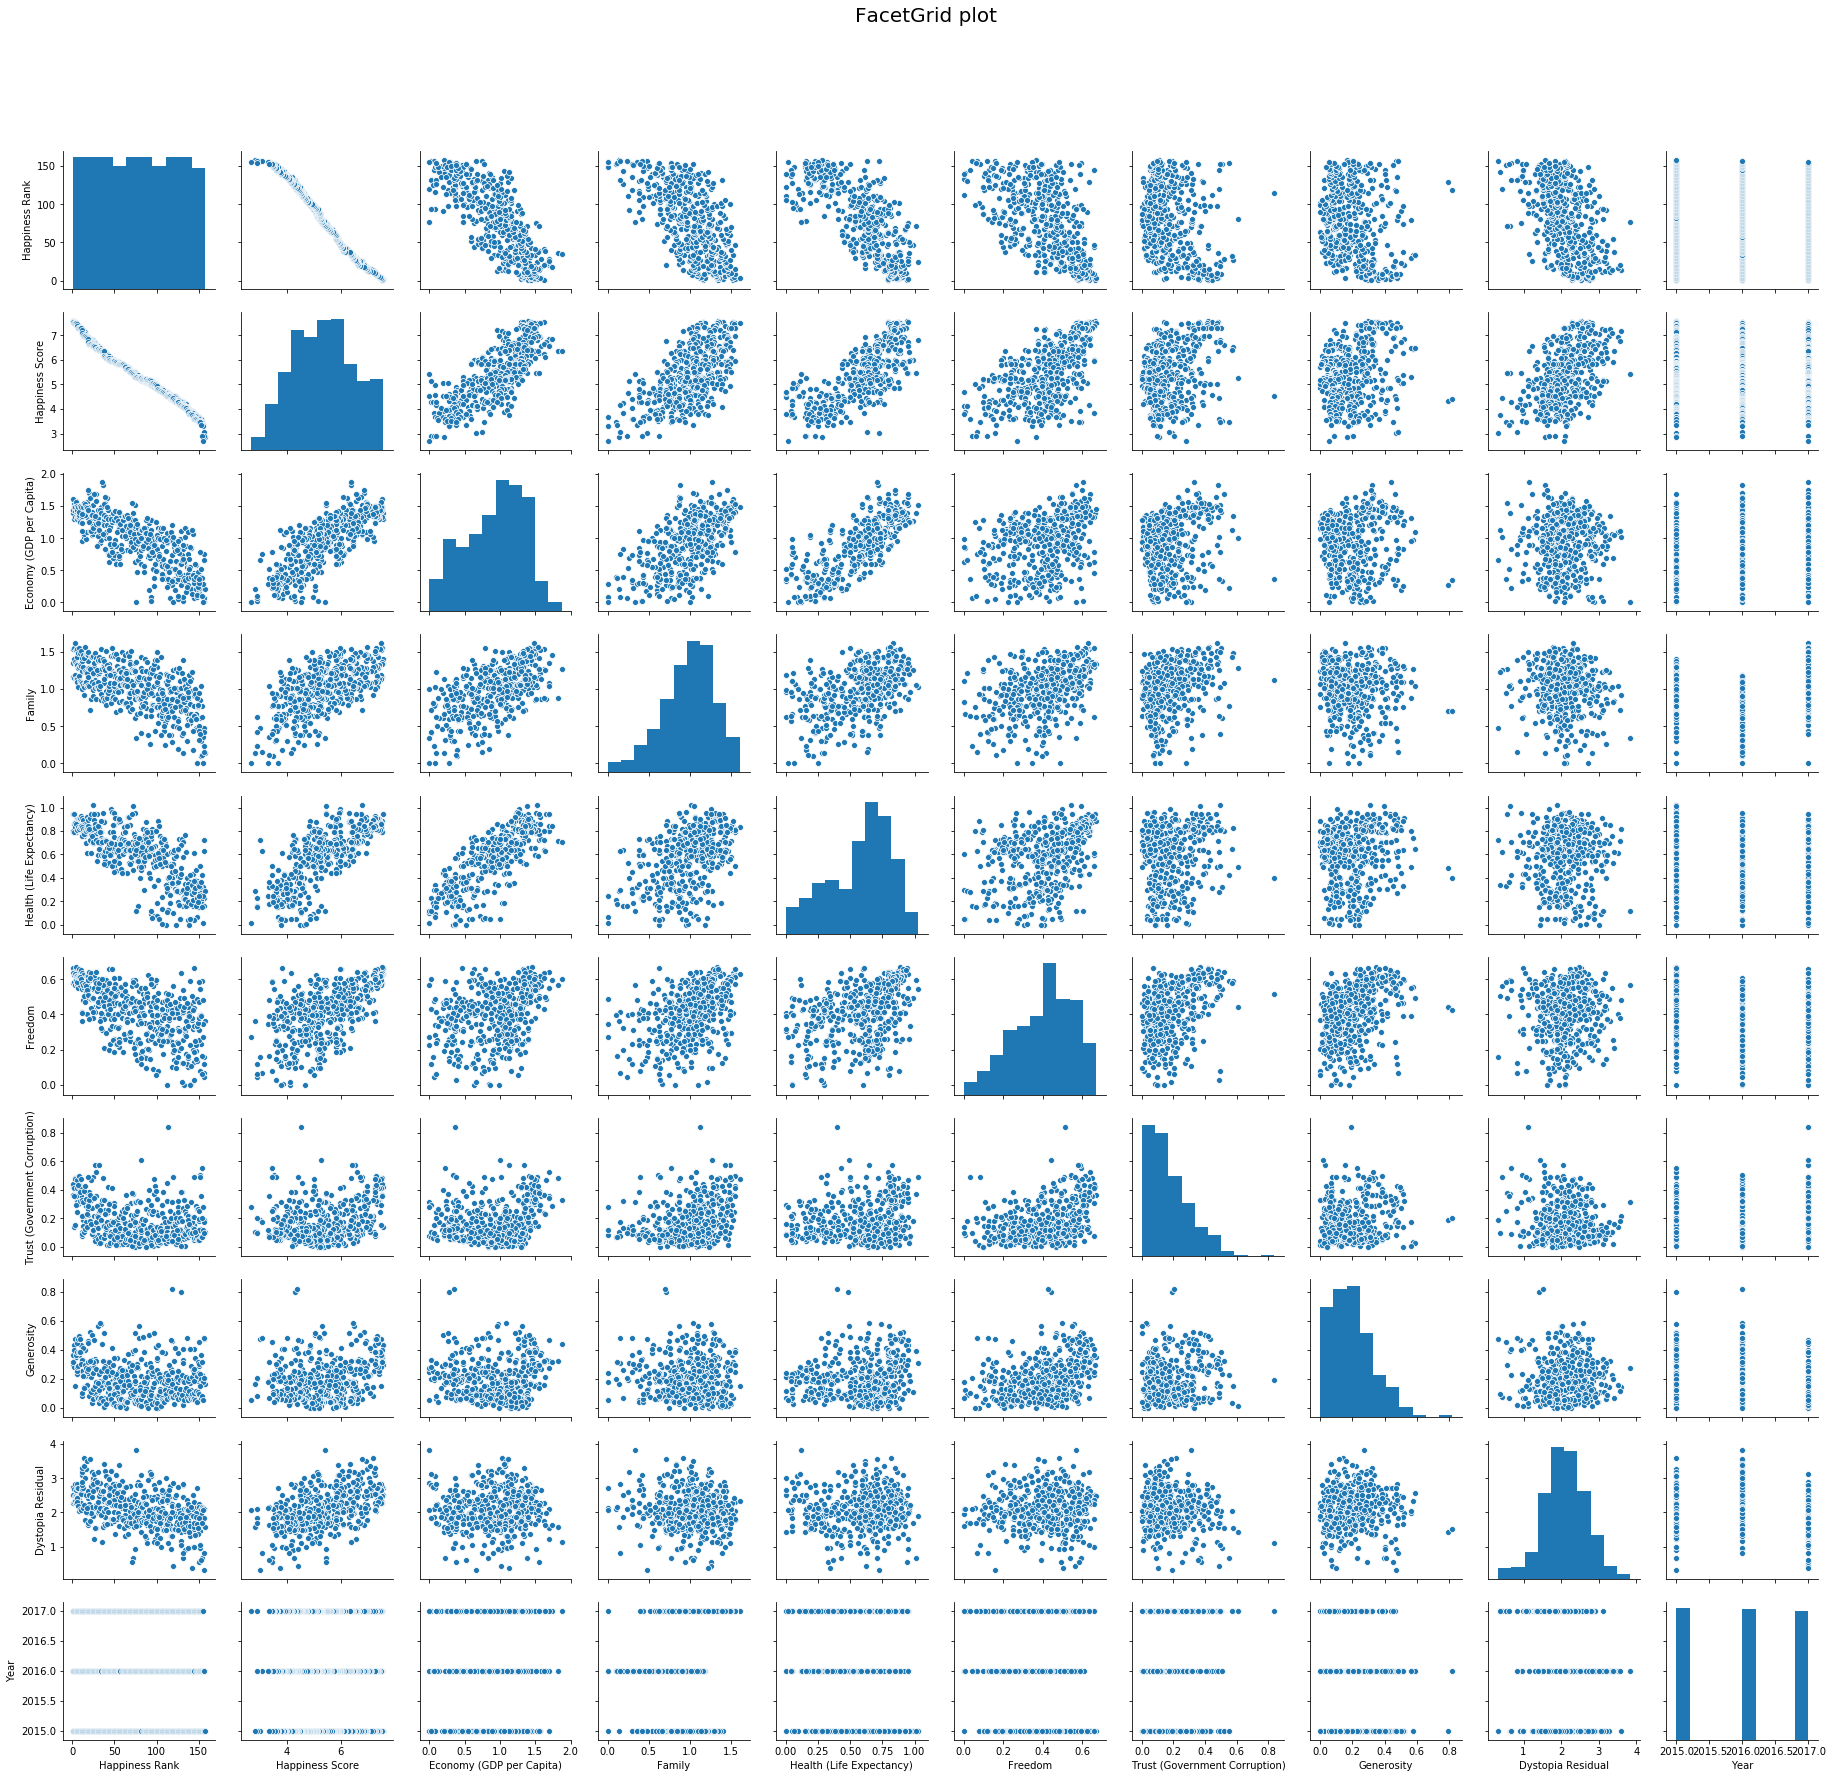

In [9]:
g = sns.pairplot(data)
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9);

## What do we see here?
I need you to take 1-2 mins to just look at the plot. It's messy at first but you will get it.

We see two types of plot. 
- Histograms
 * Take some time to look at the x axis and y axis of the histogram. There are the same! This shows the distribution of each attribute.
- Scatter plot
 * This shows the relationship between 2 attributes. We can see a strong linear correlation between Happiness Rank and Happiness Score. That is because the rank is determined by the score. 

What we are interested in finding out is the correlation between happiness score and each attribute. From the plot if we look at the second column from the left (Happiness score on x-axis), we do notice that econimic, family and health have positive linear correlation. Well, the truth is what you see may be different from what others see. We need to prove it through some form of numeric values and this tutorial will be focused on that.

## Correlation between Happiness score and economic 

### What I plan to do:
- Assign the required attribute as a list and assign that to a variable
- Use .corr() to find correlation. 
 * If you look at the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html), you will notice the default test used is pearson. Besides Pearson distribution, you get to choose between Kendall and Spearman.

### Pearson distribution
Pearson's correlation is a measure of the linear relationship between two continuous random variables. A perfect positive linear correlation will be 1. If value on x increases, value of y increases. A perfect negative correlation is -1. If X increases, Y decrease. Before we run any stats model we need to look into the assumptions.
#### Assumptions for Pearson
- Each variable needs to be continuous and not discrete. Continuous values have decimals and has a scale. Things like weight and height are continuous (10.02 KG, 1.002 cm). Decrete are fix numbers. Things like I saw 2 eggs on the table or number of visits to the doctor (1,2,3,etc). No such thing as I saw 3.42 eggs on the table or I have visited the doctor 4.3 times this year.
- Next is related pair. Related pairs refers to the pairs of variables. Each participant or observation should have a pair of values. So if the correlation was between GPA and SAT score, then each observation used should have both a GPA and a SAT value. Using this example I can only include Peter, Tom and Sam into the sample if they have both GPA and SAT score. If Sam only has GPA, I can't use Pearson.
- No outliers. Absence of outliers refers to not having outliers in either variable. Having an outlier can skew the results of the correlation by pulling the line of best fit formed by the correlation too far in one direction or another.  Typically, an outlier is defined as a value that is 3.29 standard deviations from the mean,or a standardized value of less than ±3.29.
- Linearity and homoscedasticity refer to the shape of the values formed by the scatterplot. For linearity, a “straight line” relationship between the variable should be formed.  If a line were to be drawn between all the dots going from left to right, the line should be straight and not curved. Homoscedasticity refers to the distance between the points to that straight line. The shape of the scatterplot should be tube-like in shape. If the shape is cone-like, then homoskedasticity would not be met. 

Credit to [S.SWAIN](https://www.researchgate.net/profile/S_Swain2) from Researchgate that did a wonderful explanation! 

For this practice, we will just work with Pearson.

In [10]:
# Creating a list of attributes we want (just copy the column name)
econ_happiness = ['Happiness Score','Economy (GDP per Capita)']

# Creating a dataframe that only contains these attributes
econ_corr = data[econ_happiness]

# Finding correlation
econ_corr.corr()

,Happiness Score,Economy (GDP per Capita)
Happiness Score,1.00000,0.78545
Economy (GDP per Capita),0.78545,1.00000


## What do we see here?
- Before we interpret the result we need to ask ourselves how high should the correlation coefficient be to be significant. How close to -1 or 1? For this purpose let me introduce you to $R^2$!
- Why is $R^2$ better than R?
 * Interpretation is easy.
 * For this exercise we realise that the $R^2$ value is 0.617. This tells us that 61.7% of variation can be explained by the relationship between happiness score and Economy. 

 ![alt text](https://cdn.guff.com/site_1/media/21000/20041/items/c26faf8ac4163c7d0ceac1c8.jpg)
   * **House Party conversation: What does R = 0.785 tells you?** 
     * **You** : Ummm it's closer to 1? 
     * **Kian**: $R^2$ tells you much more info. What is the difference between R = 0.5 and R = 0.7?
     * **You**: I don't care! I am not a...
     * **Kian**: It doesn't tell you much. But the $R^2$ values for them are 0.25 and 0.49 respectively which means R = 0.7 is twice as good as R = 0.5.
     * **You**: *finding dropped jaws*

Now that I got your attention, let's move on with charting. 

Text(0.5, 1.0, 'Correlation graph for Happiness score vs Economy')

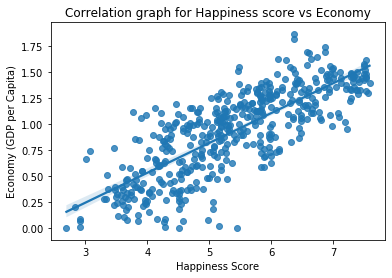

In [11]:
sns.regplot(data = econ_corr, x = 'Happiness Score', y = 'Economy (GDP per Capita)').set_title("Correlation graph for Happiness score vs Economy")

## Regression plot
For regression plot you can just use sns.regplot and input in 3 components.
1. Data
2. What to put on x axis
3. What to put on y axis

We then set a title using set_title('blah blah blah')

# Exercise for you
- I will like you to tell me the correlation coefficient (R and $R^2$) for the other 6 attributes and plot a regression plot for each of them. (Advance: Feel free to use correlation matrix)
The 6 attributes you need to work on are:
1. Family
2. Health
3. Freedom
4. Trust (Government corruption)
5. Generosity
6. Dystopia residual

- I need you to create a summary too and explain what you see. Words are important and needless to say is the key skill that will get you that job you want. 

### DataFrame prep

Here I isolate the topics that I'm interested in and create dataframes to plot with.

In [12]:
topics = [
    "Happiness Score",
    "Family",
    "Health (Life Expectancy)",
    "Freedom",
    "Trust (Government Corruption)",
    "Generosity",
    "Dystopia Residual"
]
topics_corr = data[topics]
corr_matrix = topics_corr.corr()
corr_matrix_sorted = corr_matrix["Happiness Score"].sort_values(ascending = True)
c = pd.DataFrame(corr_matrix_sorted)
c2 = c ** 2

### Correlation Matrix Graph

This graph is mainly for visualizing the topics with the least amount of correlation with the Happiness Score.

In [13]:
# found assistance with this one from:
# https://datascienceplus.com/visualize-correlation-matrices-in-python/
def correlation_matrix(df):
    #Color negative numbers red
    def color_negative_red(val):
        """
        Takes a scalar and returns a string with
        the css property `'color: red'` for negative
        strings, black otherwise.
        """
        color = "red" if val < 0 else "black"
        return f"color: {color}"

    # Hightlight large numbers
    def highlight_max(s):
        """
        Highlight the maximum in a Series yellow.
        """
        is_max = s == s.max()
        return ["background-color: yellow" if v else "" for v in is_max]

    return df.style.applymap(color_negative_red).apply(highlight_max)

In [14]:
correlation_matrix(corr_matrix)

,Happiness Score,Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1,0.636532,0.74804,0.560353,0.28213,0.221684,0.489747
Family,0.636532,1,0.486383,0.425377,0.289768,-0.0835276,-0.0815373
Health (Life Expectancy),0.74804,0.486383,1,0.359566,0.135961,0.161436,0.0576743
Freedom,0.560353,0.425377,0.359566,1,0.405894,0.346951,0.038422
Trust (Government Corruption),0.28213,0.289768,0.135961,0.405894,1,0.0843899,-0.162386
Generosity,0.221684,-0.0835276,0.161436,0.346951,0.0843899,1,0.0477654
Dystopia Residual,0.489747,-0.0815373,0.0576743,0.038422,-0.162386,0.0477654,1


### Generate Plot Function

In an effort to keep to the DRY principels, I created this function in order to facilitate with making any changes that might be required to the generation of these graphs. During their development, they required constant tweaking and without it, I would have had to repeate the same modifications in two places, instead of just one.

In [15]:
# Got some help on adding the values at the end of the bars from here:
# https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
def gen_plot(df, label):
    # Plot the figure.
    ax = df[:-1].plot(kind="barh", grid=False)
    ax.set_title("Correlation to Happines Score")
    ax.set_xlabel(label)
    ax.set_yticklabels(c.index.to_list())
    ax.set_xlim(0, 1) # expand xlim to make labels easier to read
    ax.legend_.remove()

    rects = ax.patches

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        ha = "left"

        # If value of bar is negative: Place label left of bar
        if x_value < 0:
            # Invert space to place label to the left
            space *= -1
            # Horizontally align label at right
            ha = "right"

        # Use X value as label and format number with two decimal place
        label = "{:.2f}".format(x_value)

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(space, 0),          # Horizontally shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            va='center',                # Vertically center label
            ha=ha)                      # Horizontally align label differently for
                                        # positive and negative values.

### Regression Plots

I used this function to generate the regression plots. Although I didn't have to run it multiple times, I still like to keep code tidy.

In [16]:
def gen_regplots(topics):
    dims = (24, 12)
    fig, ax = plt.subplots(figsize=dims)
    plot = 0
    
    # loop over the topics of interest and plot them
    for n, topic in enumerate(topics[1:], 1):
        plt.subplot(2,3, n)
        comp = ["Happiness Score", topic]
        comp_corr = data[comp]
        r_squared = round(r2[topic], 2)
        title = f"R-Squared Value: {r_squared}"
        with sns.axes_style("white"):
            sns.regplot(
                data=comp_corr,
                x="Happiness Score",
                y=topic
            ).set_title(title)
    
    # general title
    plt.suptitle(
        "Correlation graphs for Happiness Score",
        fontsize=20,
        fontweight=0,
        color="black",
        style="italic",
    )

### Exploring the Data

Here is where I start to try and gather the data requested and exploring what the data is trying to tell us.

In [17]:
print(f"{'R Values':^41}\n{corr_matrix.iloc[1:,0]}")

                R Values                 
Family                           0.636532
Health (Life Expectancy)         0.748040
Freedom                          0.560353
Trust (Government Corruption)    0.282130
Generosity                       0.221684
Dystopia Residual                0.489747
Name: Happiness Score, dtype: float64


In [18]:
r2 = corr_matrix.iloc[:,0] ** 2
print(f"{'R-Squared Values':^41}\n{r2[1:]}")

            R-Squared Values             
Family                           0.405173
Health (Life Expectancy)         0.559564
Freedom                          0.313996
Trust (Government Corruption)    0.079597
Generosity                       0.049144
Dystopia Residual                0.239852
Name: Happiness Score, dtype: float64


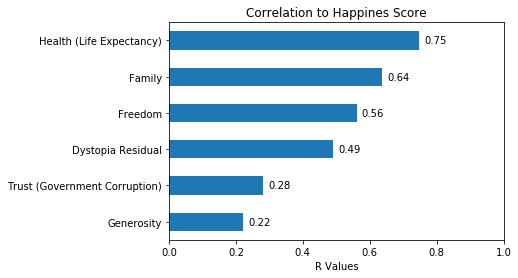

In [19]:
gen_plot(c, "R Values")

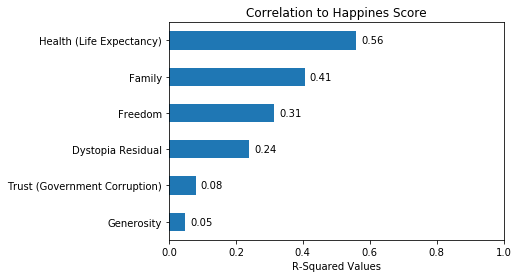

In [20]:
gen_plot(c2, "R-Squared Values")

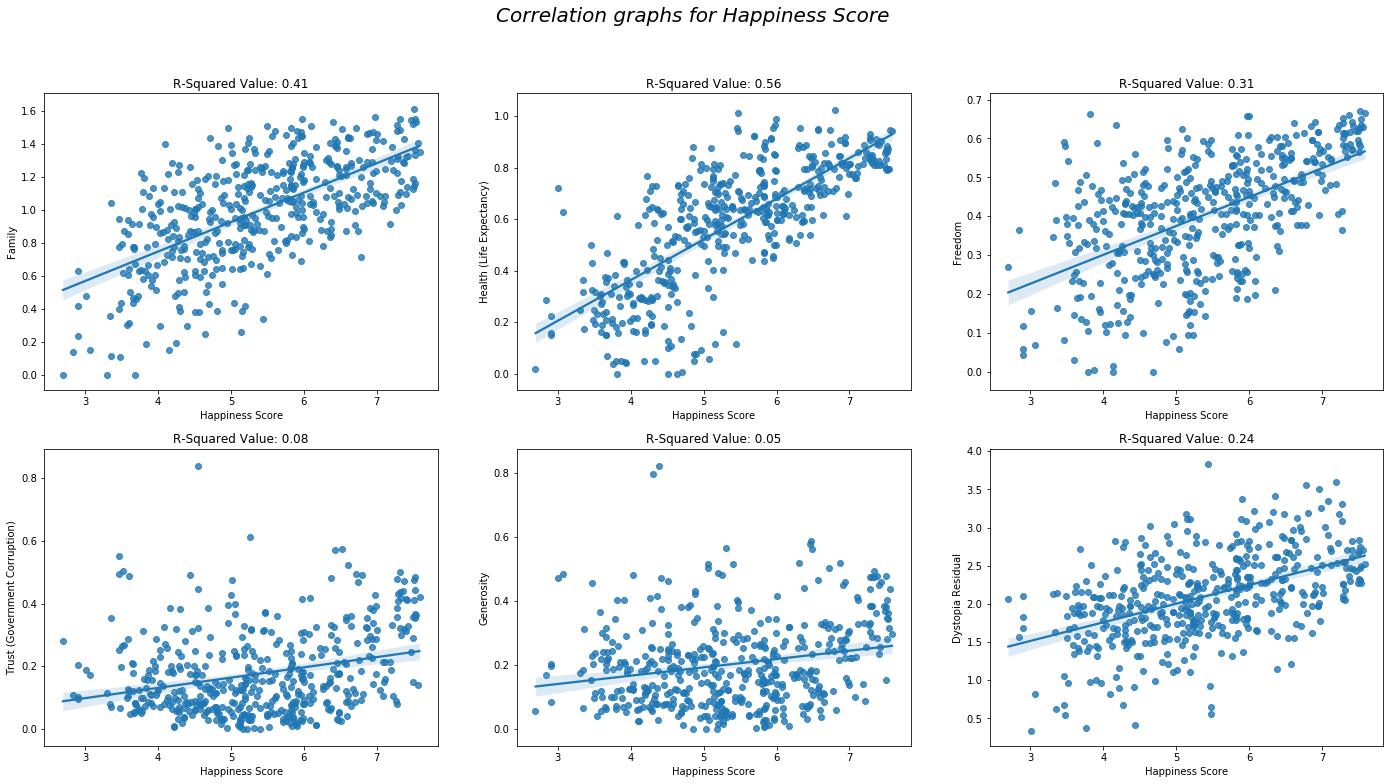

In [21]:
gen_regplots(topics)

### Summary

From looking at all of these values, I can conclude the following:

- **Health (Life Expentancy)** is 56% positively correlated with the *Happiness Score*
- **Family** is 41% positively correlated with the *Happiness Score*
- **Freedom** is 31% positively correlated with the *Happiness Score*
- **Distopia Residual** is 24% positively correlated with the *Happiness Score* 
- **Trust (Government Corruption)** is 8% postively correlated with the *Happiness Score**
- **Generosity** is positively correlated with the *Happiness Score*

I found it interesting that **Trust (Government Corruption)** was 2.6% negatively correlated to the *Distopia Residual*, which kind of makes sense. Also that **Generosity** was 0.7% negatively correlated with *Family*. It doesn't affect it much but does that mean that when you don't help out the family when there is a need, that it'll cause people to talk about you behind your back, but overall is overlooked because hey, you're family!?